In [1]:
%matplotlib inline
import lsst.sims.skybrightness as sb
import numpy as np
import SkyModelPre as sbp
import healpy as hp
import lsst.sims.utils as utils
import timeit

/Users/yoachim/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
nside = 32
hpindx = np.arange(hp.nside2npix(nside))
ra, dec = utils._hpid2RaDec(nside, hpindx)

classic_model = sb.SkyModel(mags=True)

In [3]:
new_model = sbp.SkyModelPre('generated_sky.npz')

In [4]:
def callClassic(sm, ra, dec, mjds):
    for mjd in mjds:
        sm.setRaDecMjd(ra, dec, mjd)
        mags = sm.returnMags()

In [5]:
def callNew(sm, mjds):
    for mjd in mjds:
        mags = sm.full_sky(mjd)

In [6]:
step = 2. /60. / 24.  # 2 minute timestep
mjds = np.arange(200)*step + 59560.2+0.1

/Users/yoachim/anaconda/opt/lsst/healpy/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/pixelfunc.py:1045: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if phi == None:
/Users/yoachim/anaconda/opt/lsst/healpy/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/pixelfunc.py:252: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:2255: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/anaconda/opt/lsst/healpy/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/projaxes.py:996: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/anaconda/opt/lsst/healpy/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/projaxes.py:997: RuntimeWarning: invalid

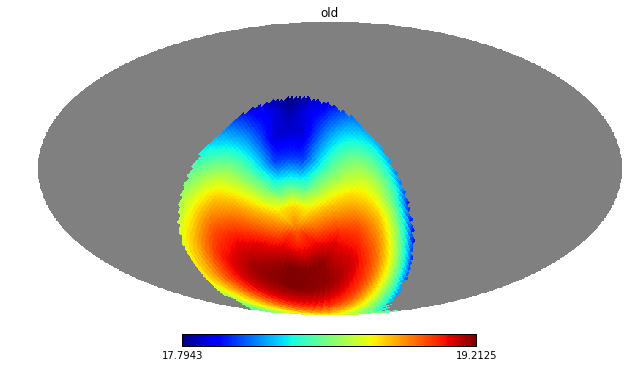

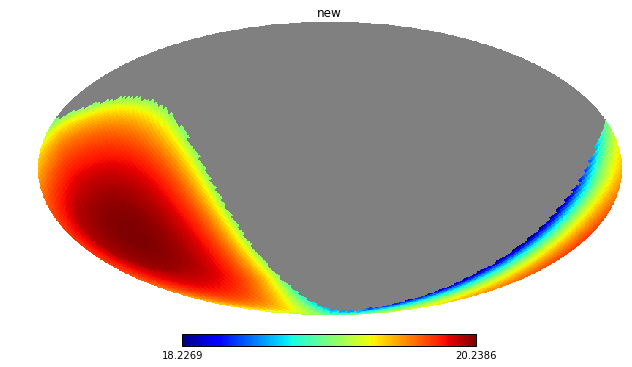

In [7]:
# Check that the results from the 2 look similar
# mjd = mjds[100]
mjd = new_model.info['mjds'][10]
classic_model.setRaDecMjd(ra, dec, mjd)
mags1 = classic_model.returnMags()
hp.mollview(mags1['r'], title='old')
mags2 = new_model.full_sky(mjd)
hp.mollview(mags2['r'], title='new')

In [8]:
time1 = timeit.timeit("callClassic(classic_model,ra ,dec, mjds)", number=1, 
                     setup="from __main__ import callClassic, classic_model,ra,dec,mjds")
print 'Classic model time = %f' % time1

Classic model time = 39.162521


In [9]:
time = timeit.timeit("callNew(new_model, mjds)", number=1, 
                     setup="from __main__ import callNew, new_model, mjds")
print 'New model time = %f' % time

New model time = 0.005184


In [10]:
print "speedup factor = %f" % (time1/time)

speedup factor = 7554.593110


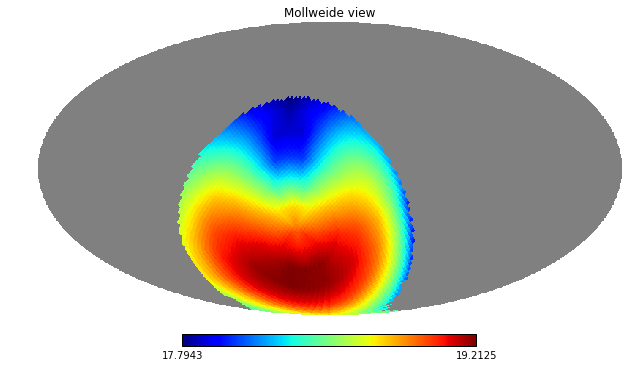

In [11]:
hp.mollview(new_model.sb['r'][10,:])